**Zad.1 pkt. 1.1**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay
import missingno as msno

**Zad.1 pkt. 1.2**

In [ ]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Zad.1 pkt. 1.3**

In [ ]:
print(df.describe())
print(df.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

**Zad.1 pkt. 1.4**

In [ ]:
print(df.isnull().any())
print(df.isnull().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Zad.1 pkt. 1.5**

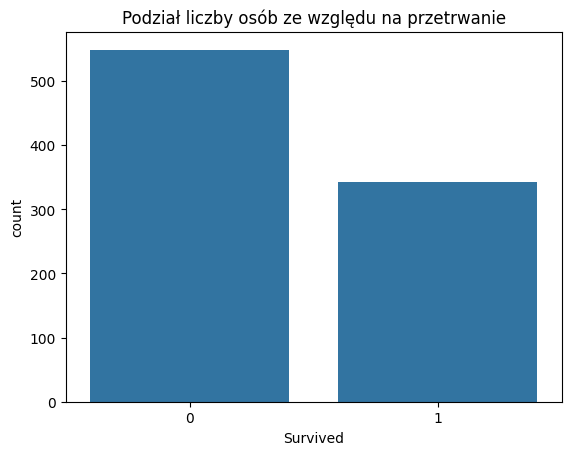

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title('Podział liczby osób ze względu na przetrwanie')
plt.show()

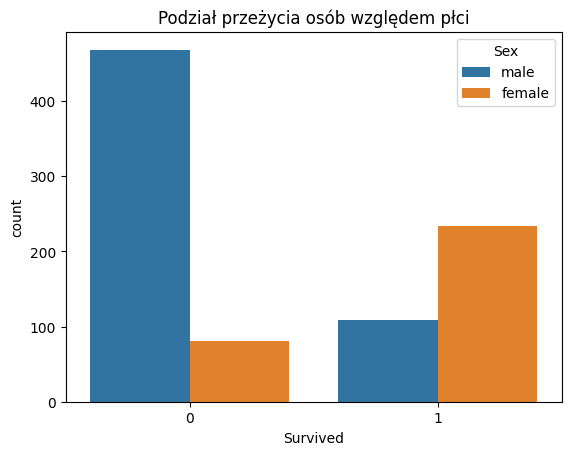

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Podział przeżycia osób względem płci')
plt.show()

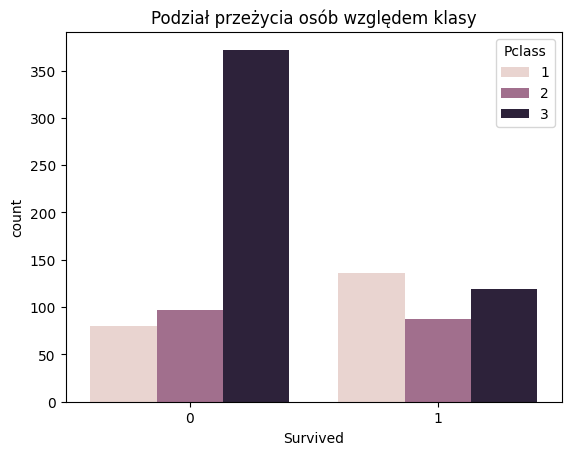

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Podział przeżycia osób względem klasy')
plt.show()

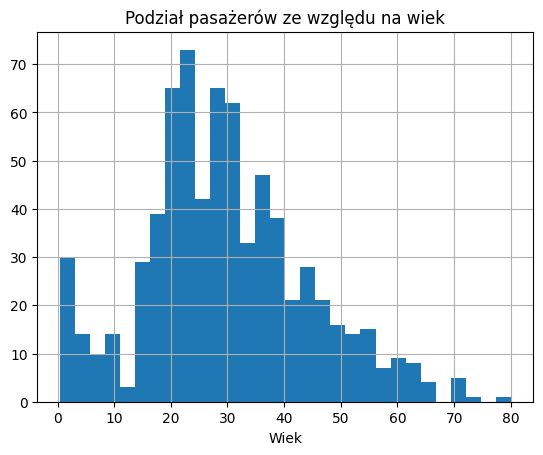

In [ ]:
df['Age'].hist(bins=30)
plt.title('Podział pasażerów ze względu na wiek')
plt.xlabel('Wiek')
plt.show()

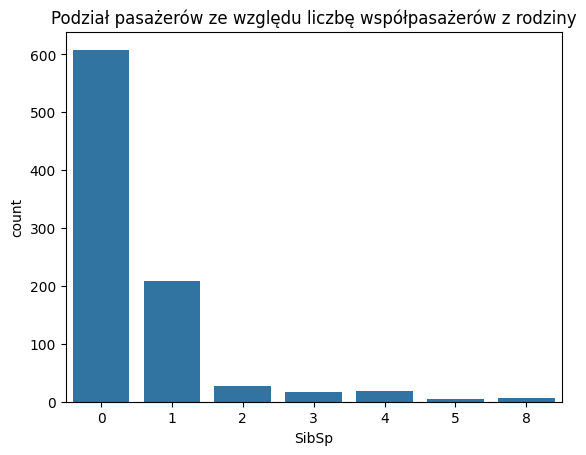

In [ ]:
sns.countplot(x='SibSp', data=df)
plt.title('Podział pasażerów ze względu liczbę współpasażerów z rodziny')
plt.show()

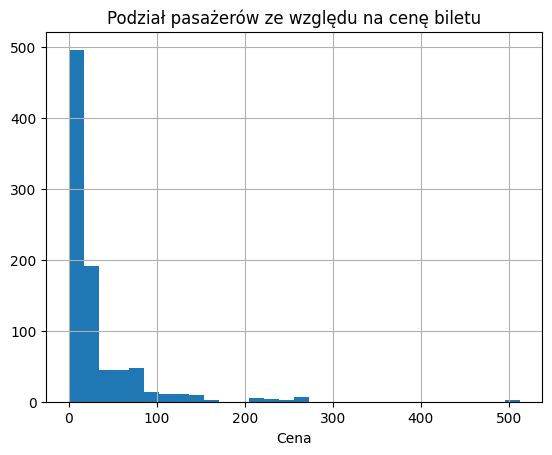

In [ ]:
df['Fare'].hist(bins=30)
plt.title('Podział pasażerów ze względu na cenę biletu')
plt.xlabel('Cena')
plt.show()

**Zad.1 pkt. 2.1-2**

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


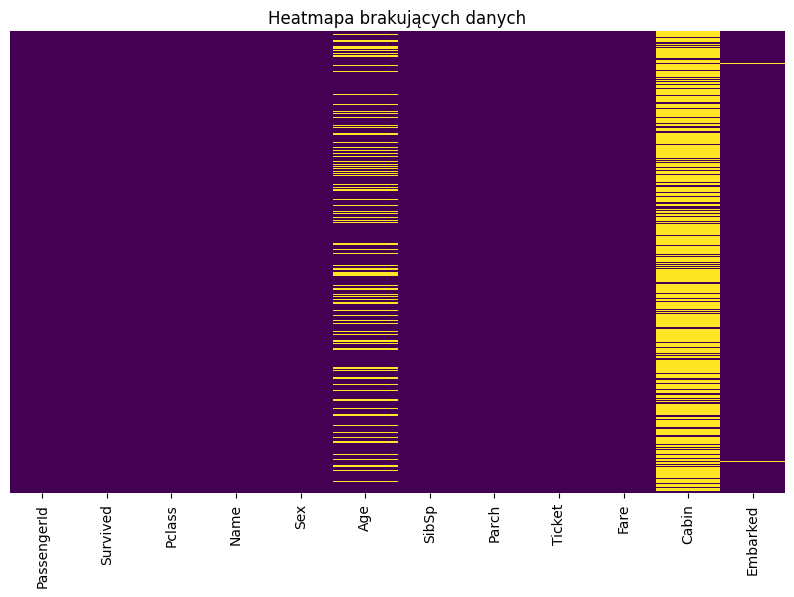

In [ ]:
print(df.isnull().mean() * 100)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmapa brakujących danych')
plt.show()


**Zad.1 pkt. 2.3**

In [ ]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

**Zad.1 pkt. 2.4**

In [ ]:
df_titanic = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [ ]:
df_titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

**Zad.1 pkt. 3**

In [ ]:
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Zad.1 pkt. 4-6**

In [ ]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

[[98  9]
 [24 47]]


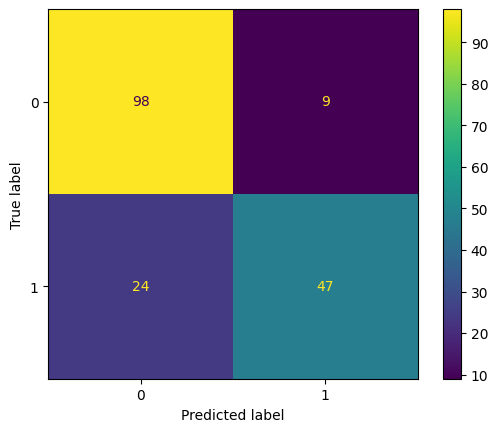

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

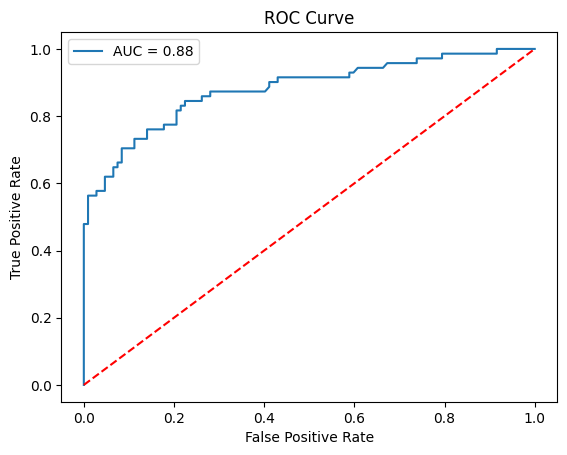

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

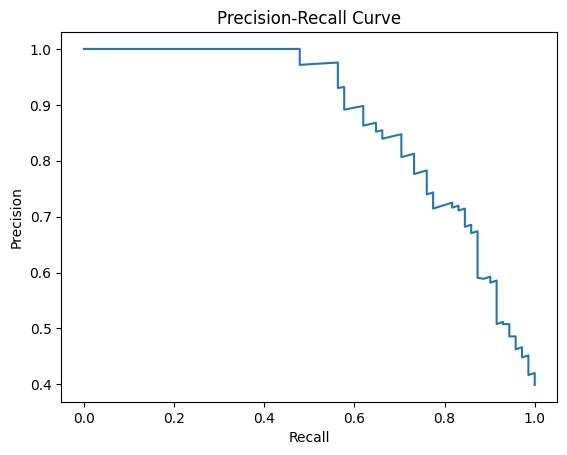

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


**Zad. 2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv(url, header=None, names=columns)

In [ ]:
data.isnull().sum().any()

False

In [ ]:
print(data.describe())
print(data.info())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

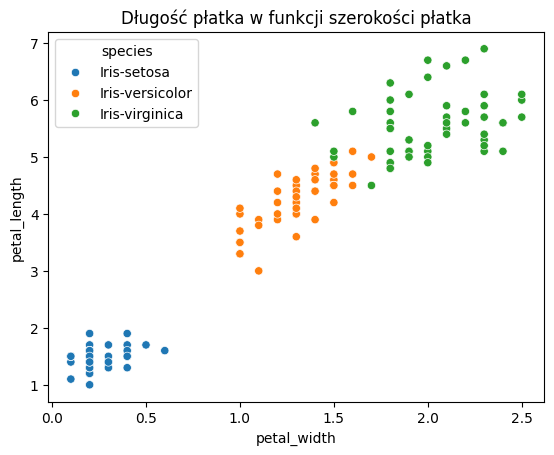

In [ ]:
sns.scatterplot(x="petal_width", y="petal_length", hue="species", data=data)
plt.title("Długość płatka w funkcji szerokości płatka")
plt.show()

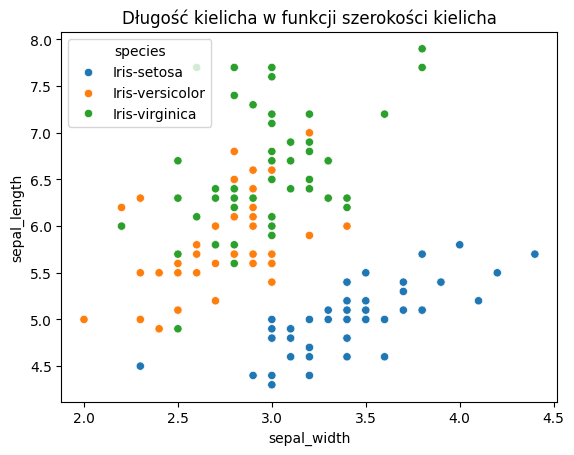

In [ ]:
sns.scatterplot(x="sepal_width", y="sepal_length", hue="species", data=data)
plt.title("Długość kielicha w funkcji szerokości kielicha")
plt.show()

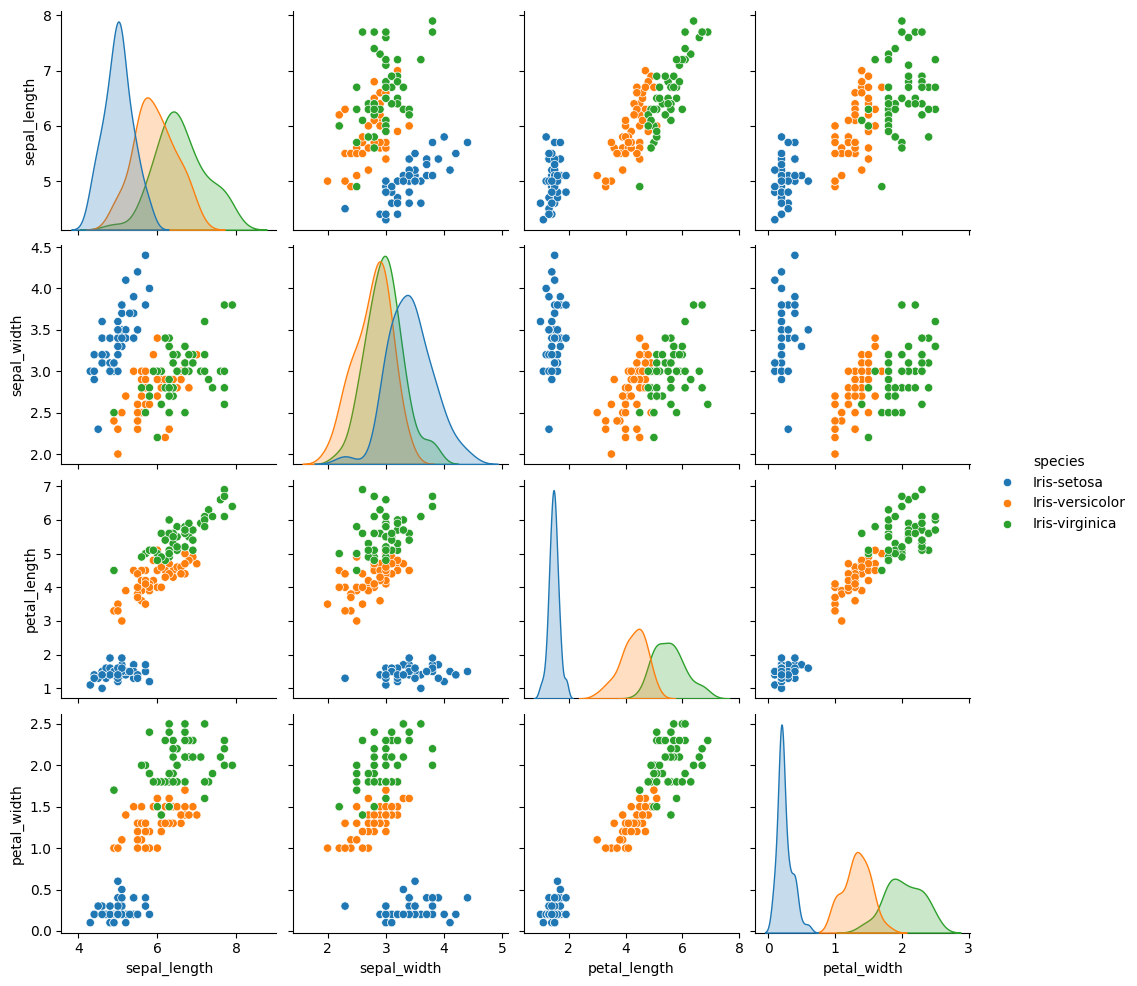

In [ ]:
sns.pairplot(data, hue="species")
plt.show()

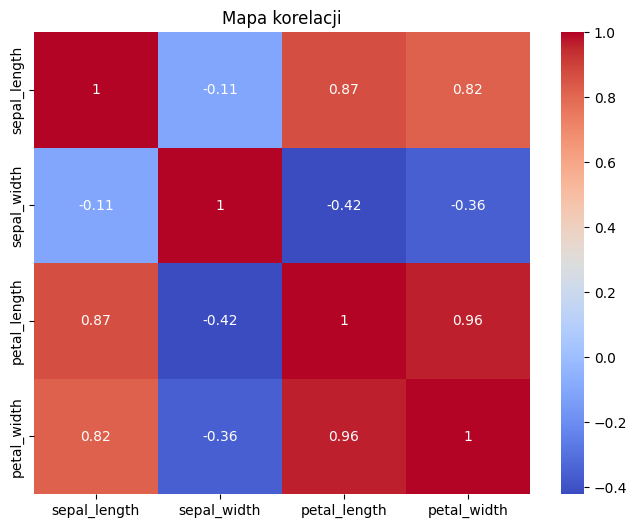

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop(['species'], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Mapa korelacji")
plt.show()

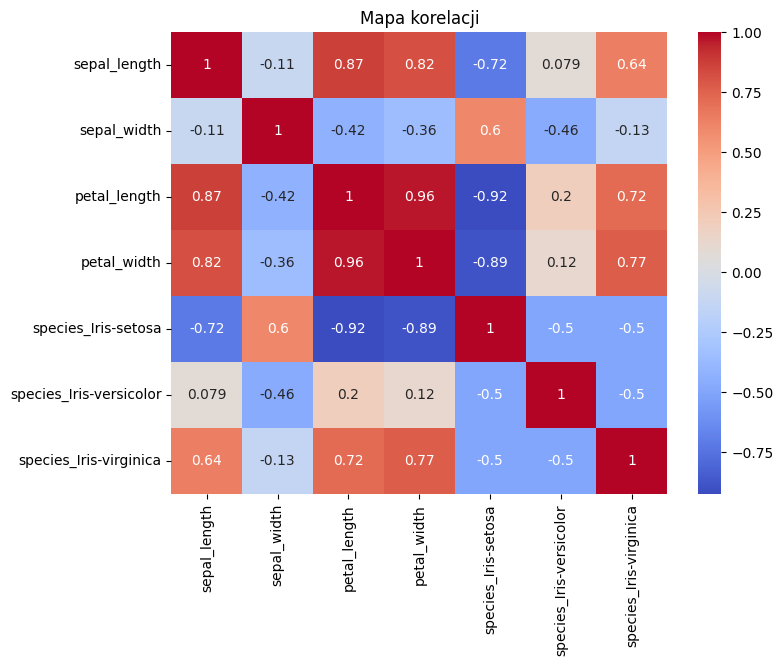

In [ ]:
data_dummies = pd.get_dummies(data, columns=['species'])

plt.figure(figsize=(8, 6))
sns.heatmap(data_dummies.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa korelacji")
plt.show()

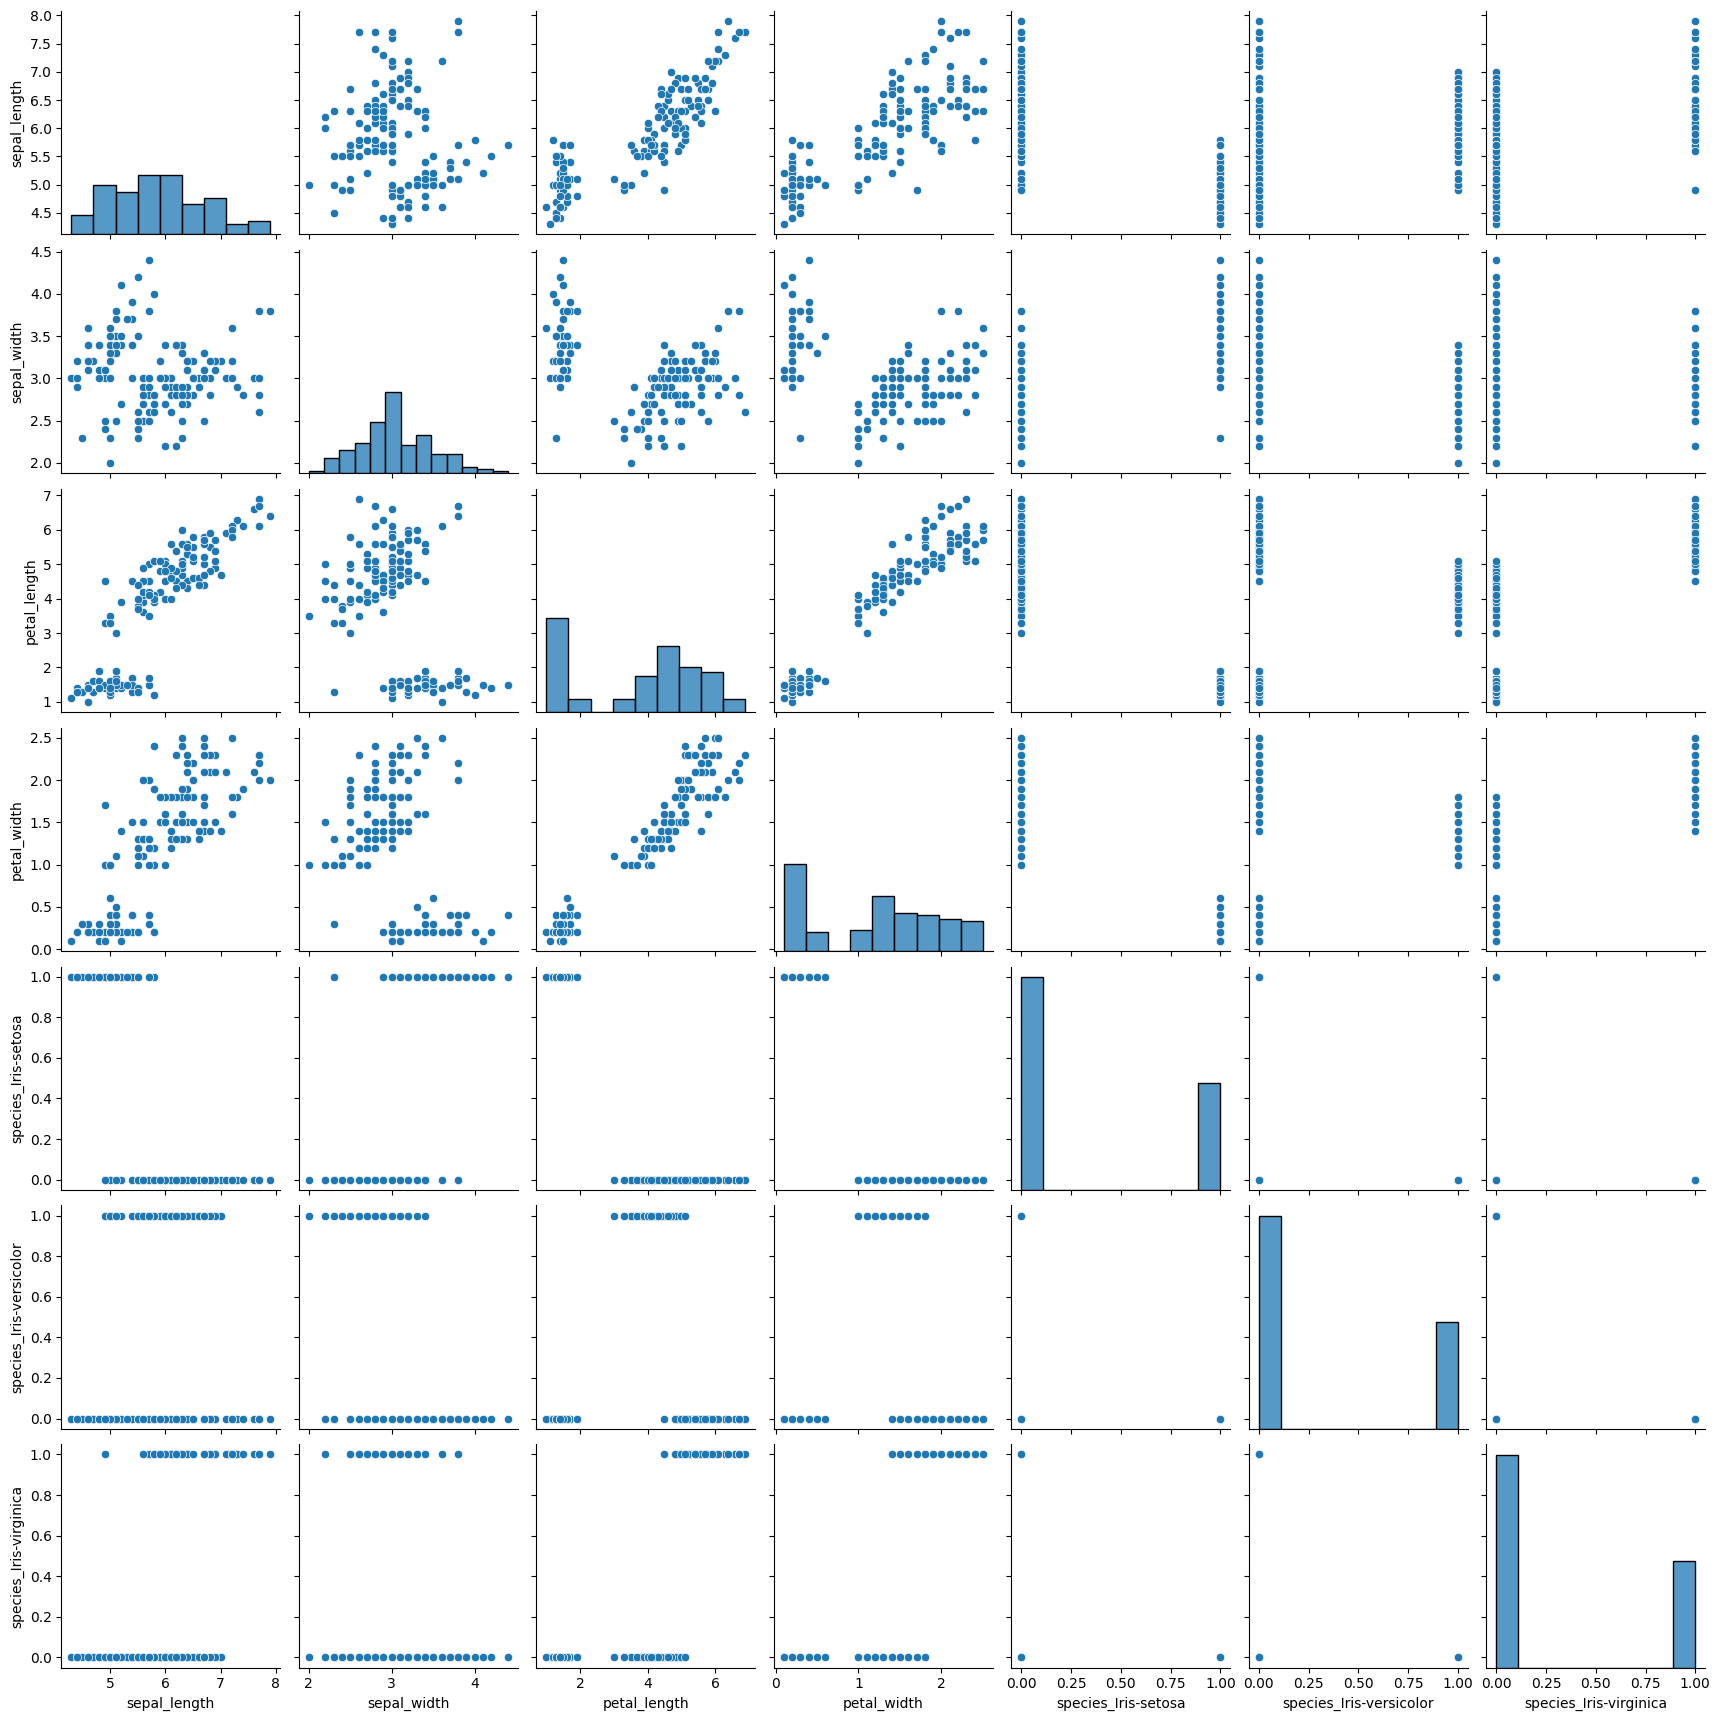

In [ ]:
sns.pairplot(data_dummies)

In [ ]:
X1 = data[['petal_width']]
y1 = (data['species'] == 'Iris-virginica').astype(int)
#y1 = data_dummies['species_Iris-virginica']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [ ]:
model = LogisticRegression(random_state=101)
model.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [ ]:
y_proba = model.predict_proba(X_new)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


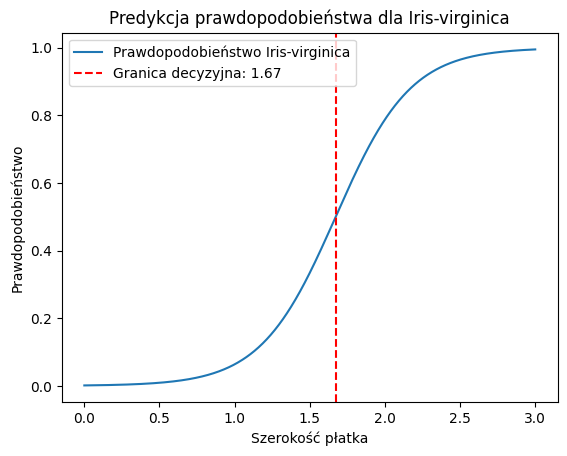

Dokładność modelu na zbiorze testowym: 0.93
Granica decyzyjna dla przewidywania Iris-virginica: 1.67


In [ ]:
decision_boundary = X_new[y_proba >= 0.5][0]

# Wizualizacja predykcji
plt.plot(X_new, y_proba, label="Prawdopodobieństwo Iris-virginica")
plt.axvline(x=decision_boundary, color="red", linestyle="--", label=f"Granica decyzyjna: {decision_boundary[0]:.2f}")
plt.xlabel("Szerokość płatka")
plt.ylabel("Prawdopodobieństwo")
plt.legend()
plt.title("Predykcja prawdopodobieństwa dla Iris-virginica")
plt.show()

# Wyniki
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2f}")
print(f"Granica decyzyjna dla przewidywania Iris-virginica: {decision_boundary[0]:.2f}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [ ]:
X = data.drop(['species'], axis=1)
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': np.logspace(0, 4, 10),
    'penalty': ['l1', 'l2']
}
log_reg = LogisticRegression(solver='liblinear', max_iter=1200)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszego modelu i jego parametrów
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

Najlepsze parametry: {'C': 21.544346900318832, 'penalty': 'l1'}
Najlepsza dokładność: 0.9458498023715414


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


LogisticRegression(C=21.544346900318832, max_iter=1200, penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print("\nRaport z klasyfikacji:")
print(classification_report(y_test, y_pred))
print("Macierz błędów:")
print(confusion_matrix(y_test, y_pred))


Raport z klasyfikacji:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

Macierz błędów:
[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]


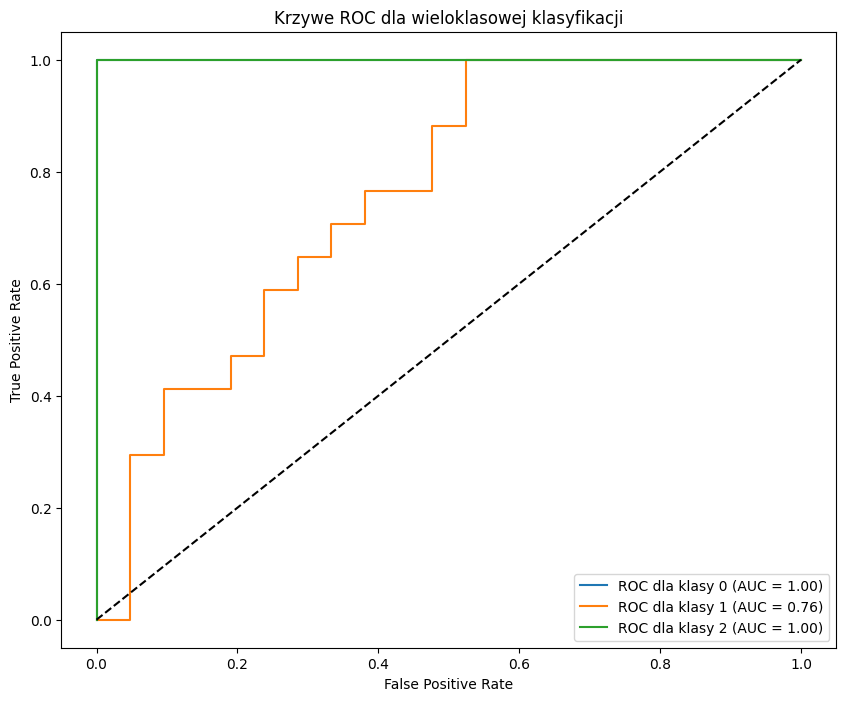

In [ ]:
y_test_bin = pd.get_dummies(y_test)
y_score = best_model.decision_function(X_test)

# Krzywe ROC dla każdej klasy
fpr = {}
tpr = {}
roc_auc = {}
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC dla klasy {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywe ROC dla wieloklasowej klasyfikacji")
plt.legend(loc="best")
plt.show()

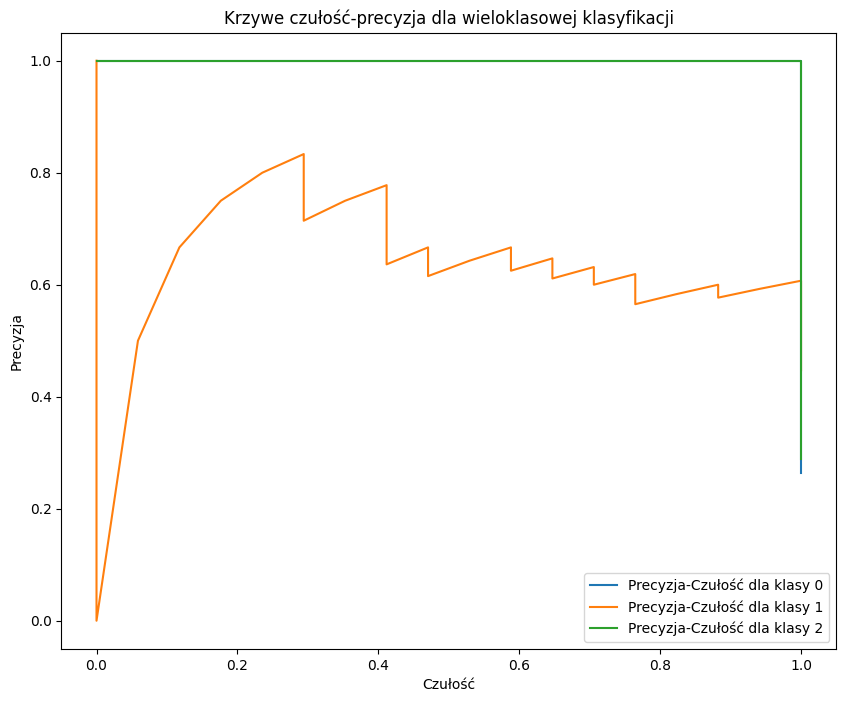

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_bin.iloc[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Precyzja-Czułość dla klasy {i}')

plt.xlabel("Czułość")
plt.ylabel("Precyzja")
plt.title("Krzywe czułość-precyzja dla wieloklasowej klasyfikacji")
plt.legend(loc="best")
plt.show()